In [1]:
import os 
import cv2
import json
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
from tensorflow.python.keras.preprocessing import image

In [2]:
image_dir = 'dataset/images'
masks_dir = 'dataset/masks/'
image_list = os.listdir(image_dir)
mask_list = os.listdir(masks_dir)
image_list.sort()
mask_list.sort()
print(f'Found {len(image_list)} images and {len(mask_list)} masks')

# sanity check
for i in range(len(image_list)):
    assert image_list[i][:-3] == mask_list[i][:-3]

Found 20000 images and 20000 masks


In [3]:
with open('config.json', 'r') as f:
    config = json.load(f)
labels = config['labels']
print(f'Number of labels = {len(labels)}')
color_map = {}
for label in labels:
    color_map[label['readable']] = label['color']
label_list = sorted(color_map.keys())
train_ids = {k:v for v,k in enumerate(label_list)}

Number of labels = 66


In [4]:
def color_to_labels(color_img):
    mask = np.zeros((color_img.shape[0], color_img.shape[1]))
    for i in range(len(label_list)):
        label = label_list[i]
        binary_mask = np.all(color_img == color_map[label], axis=-1)
        mask[binary_mask] = train_ids[label]
    return mask

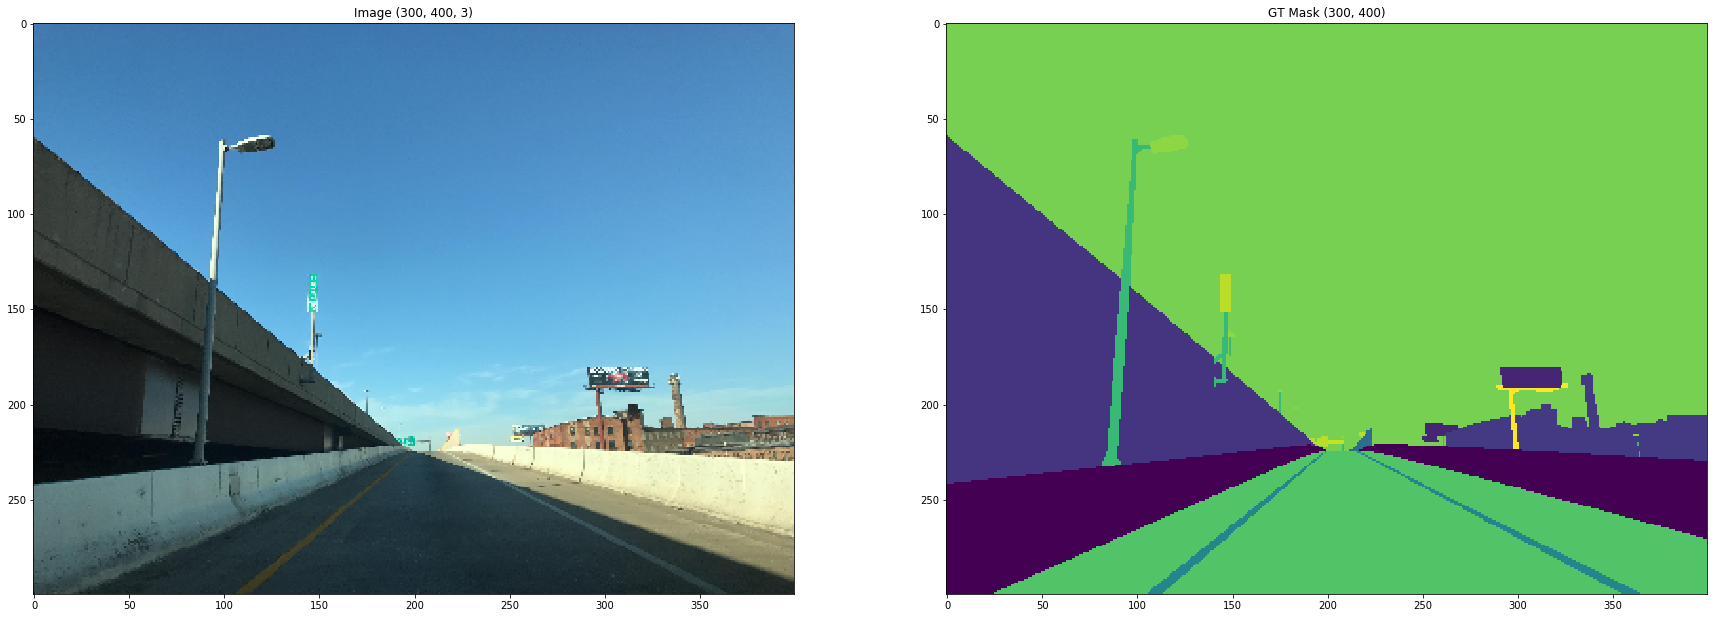

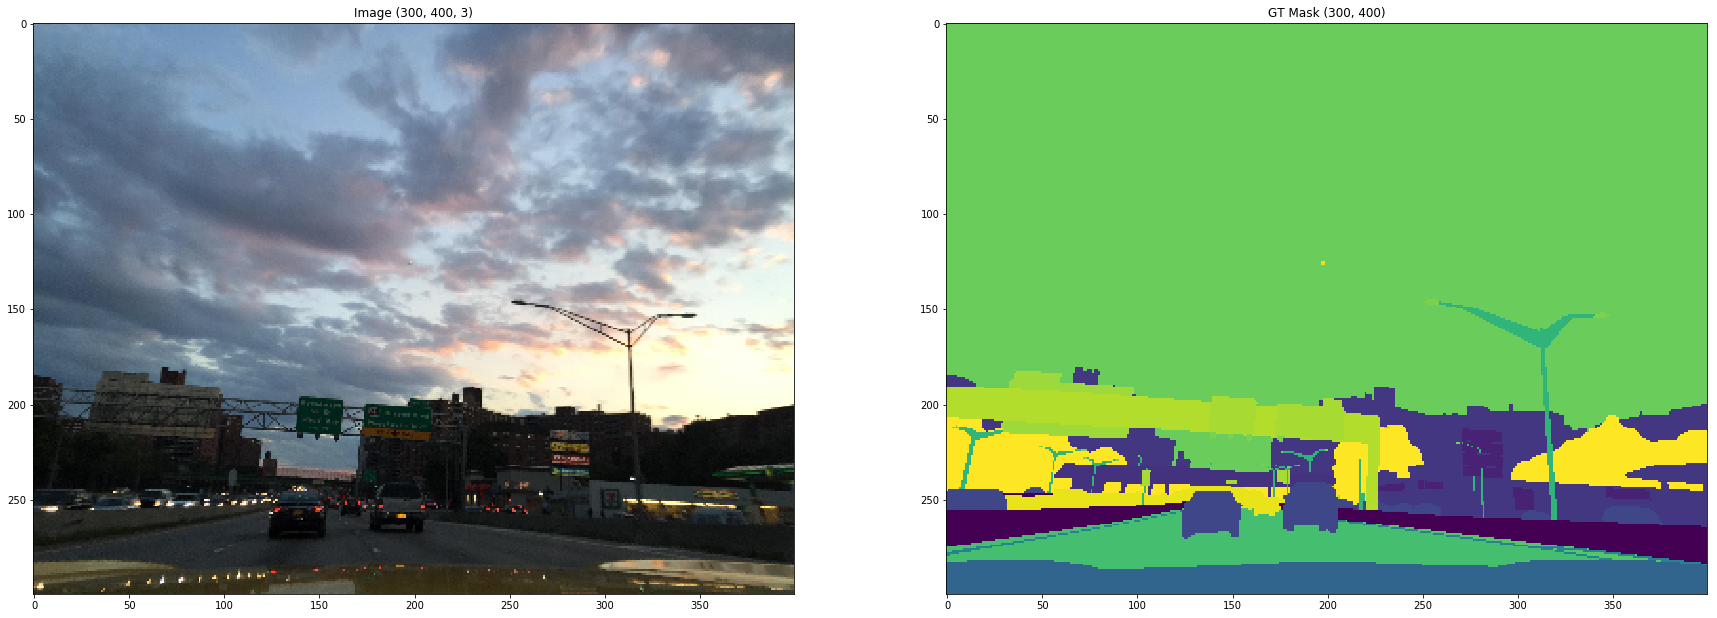

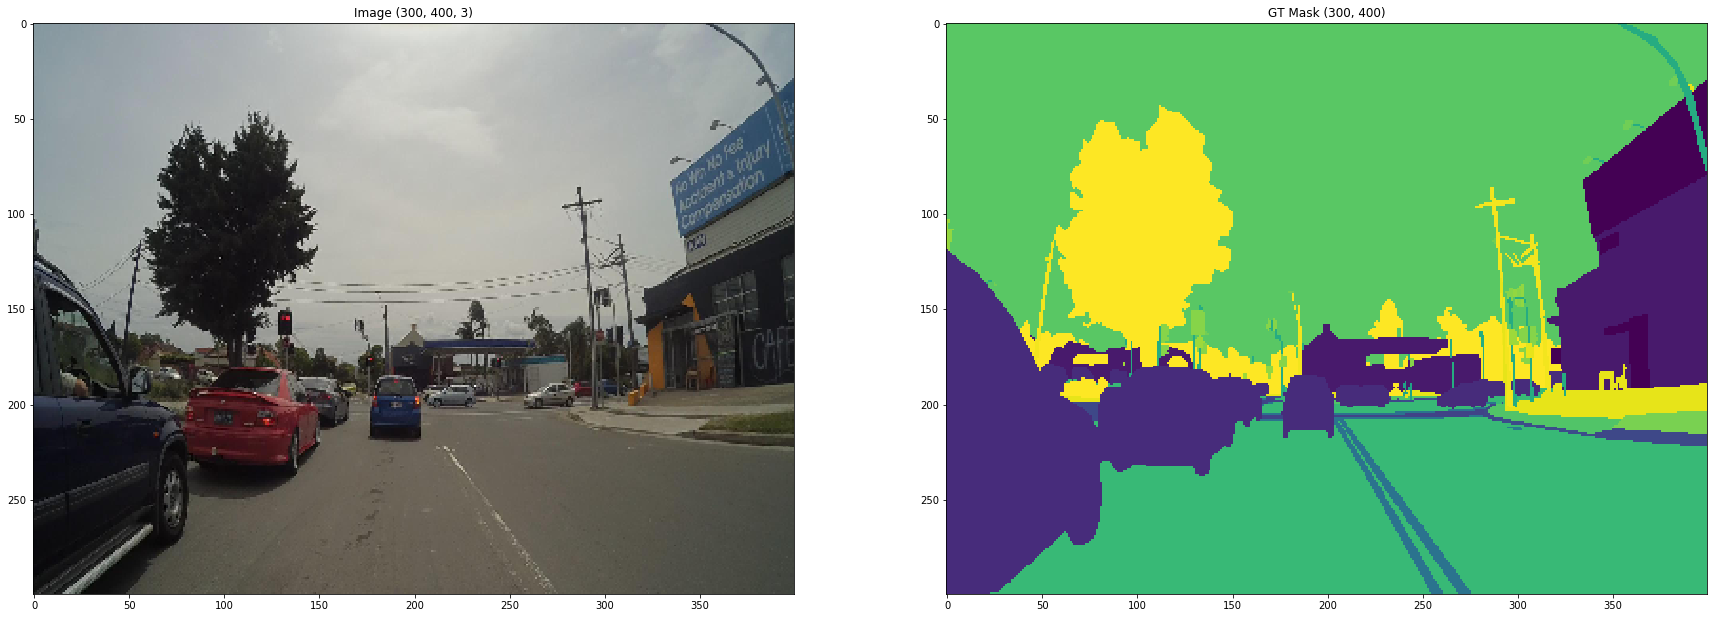

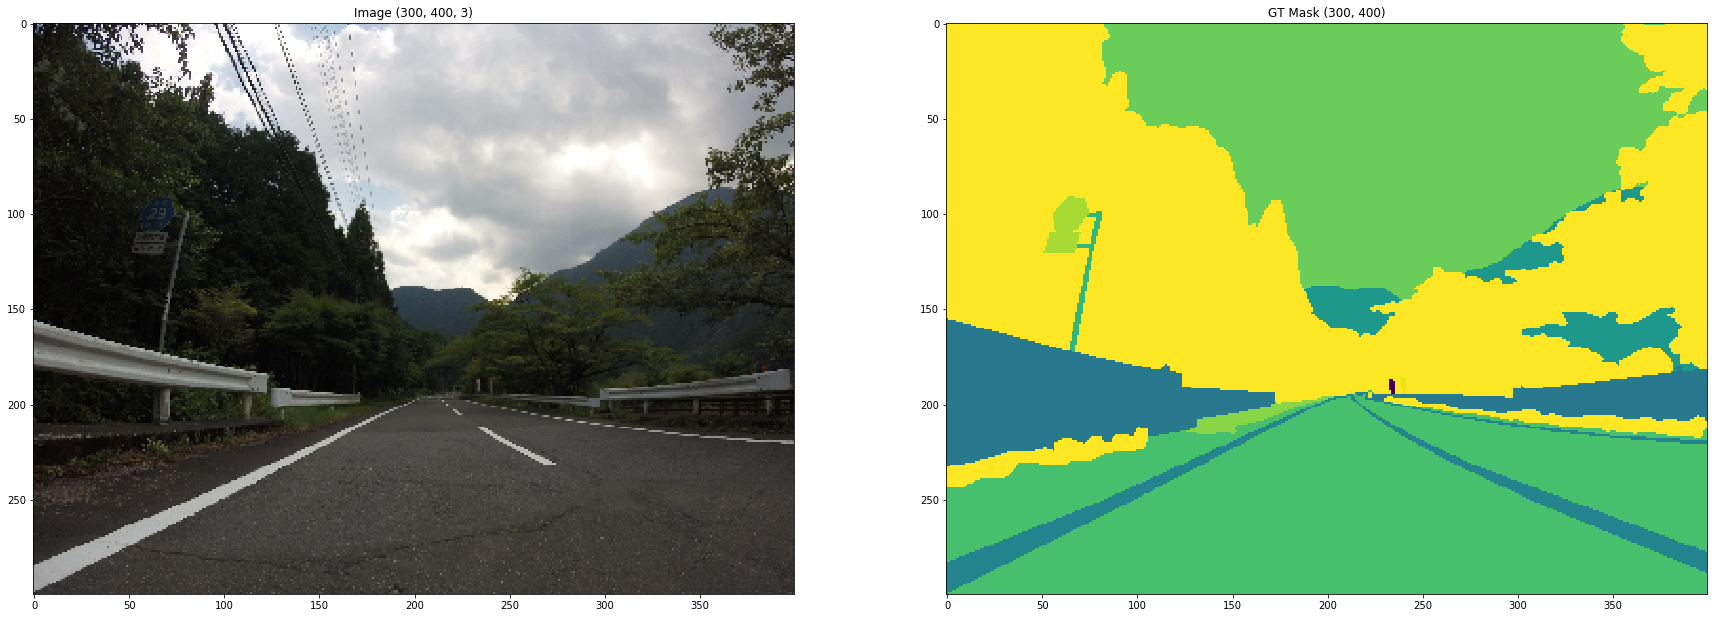

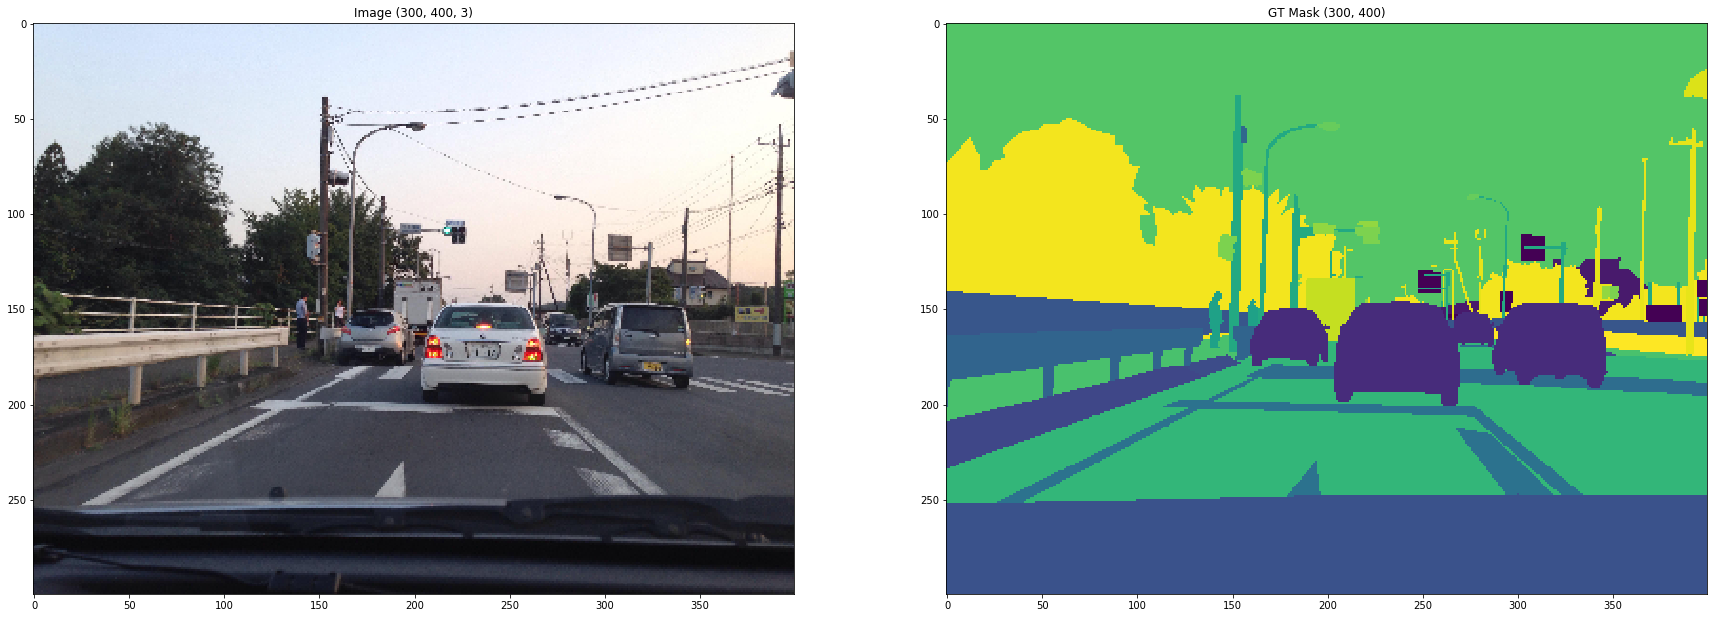

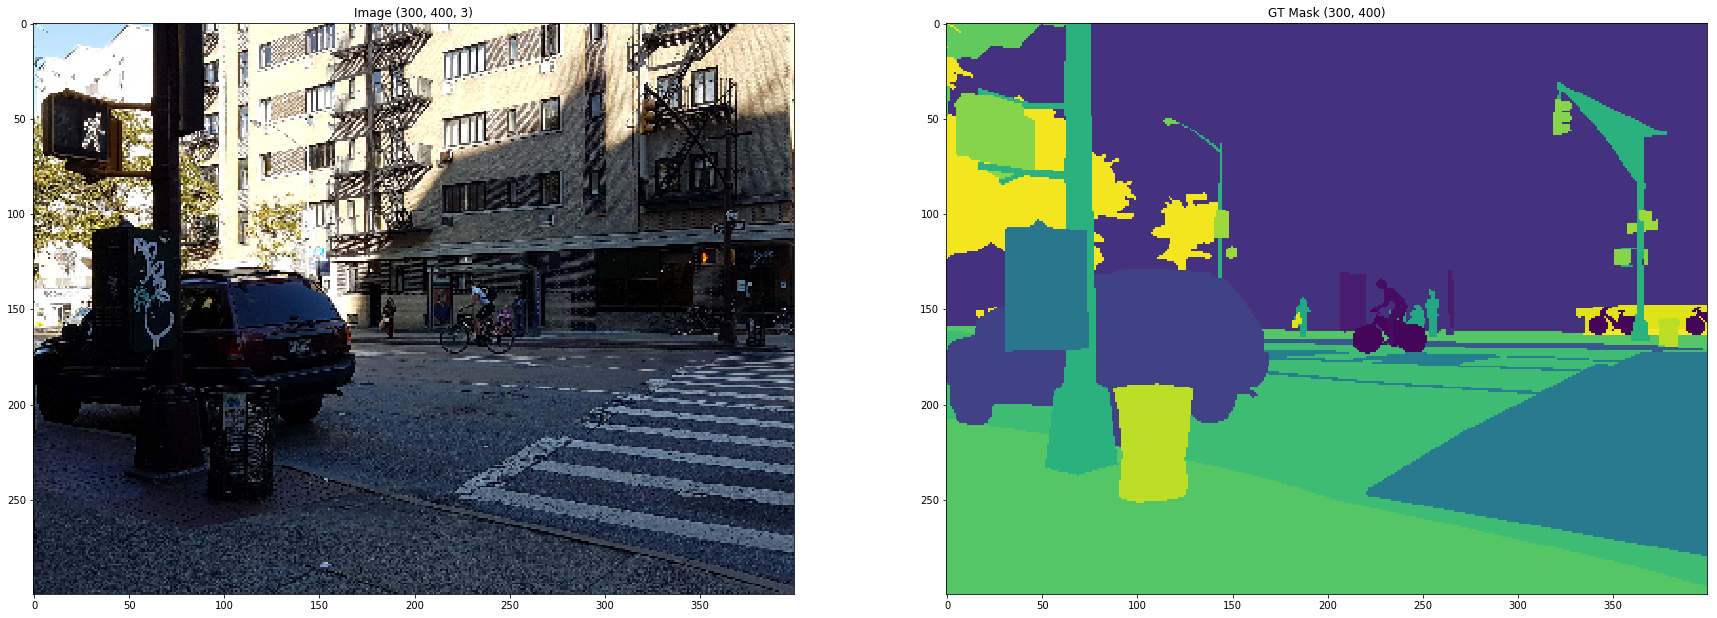

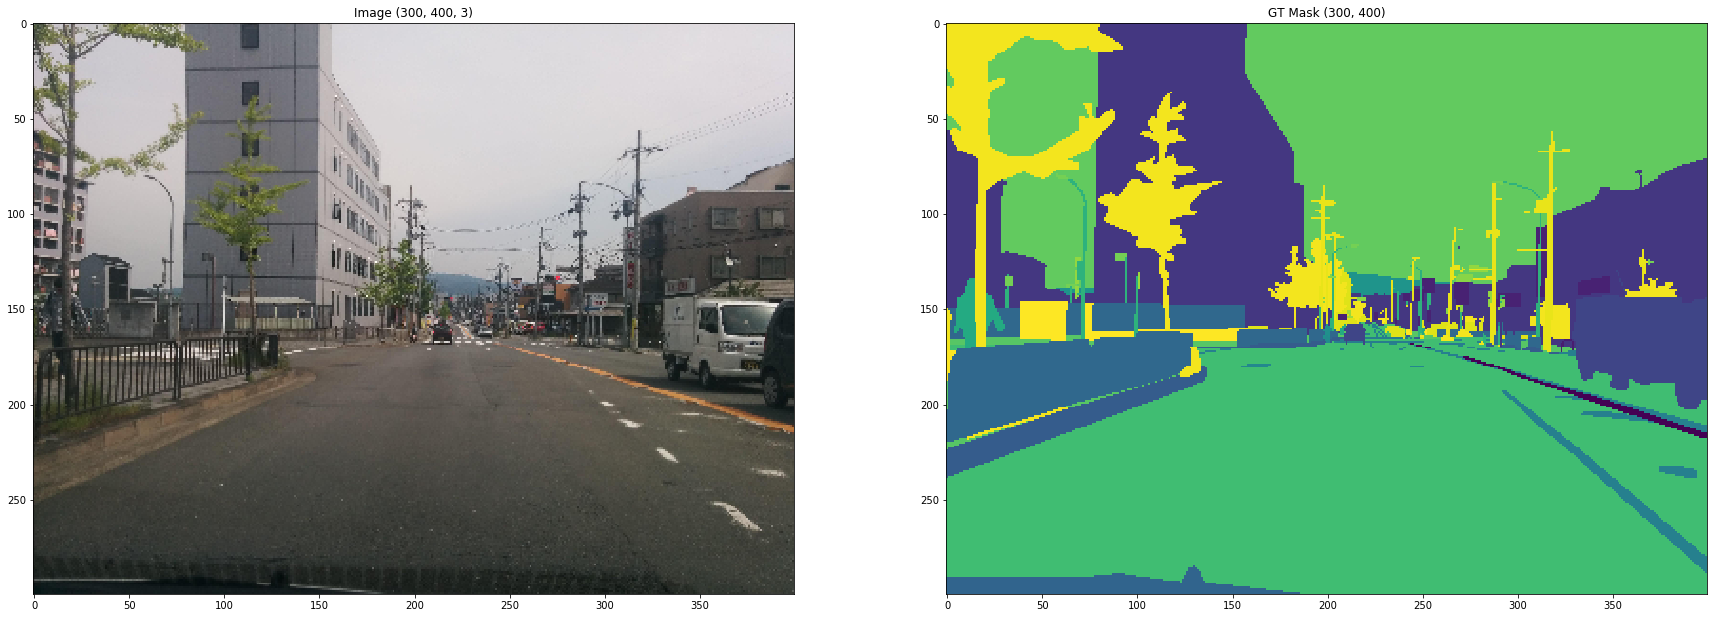

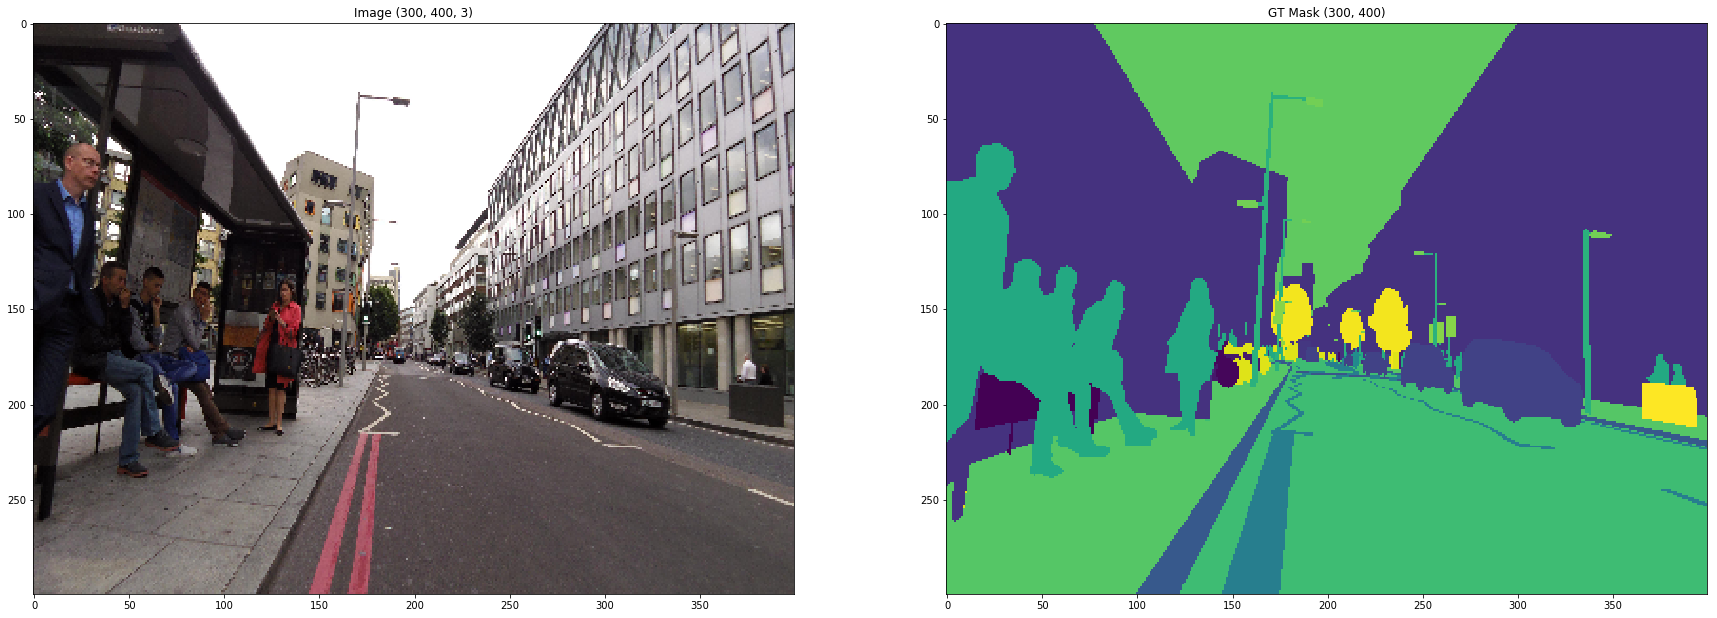

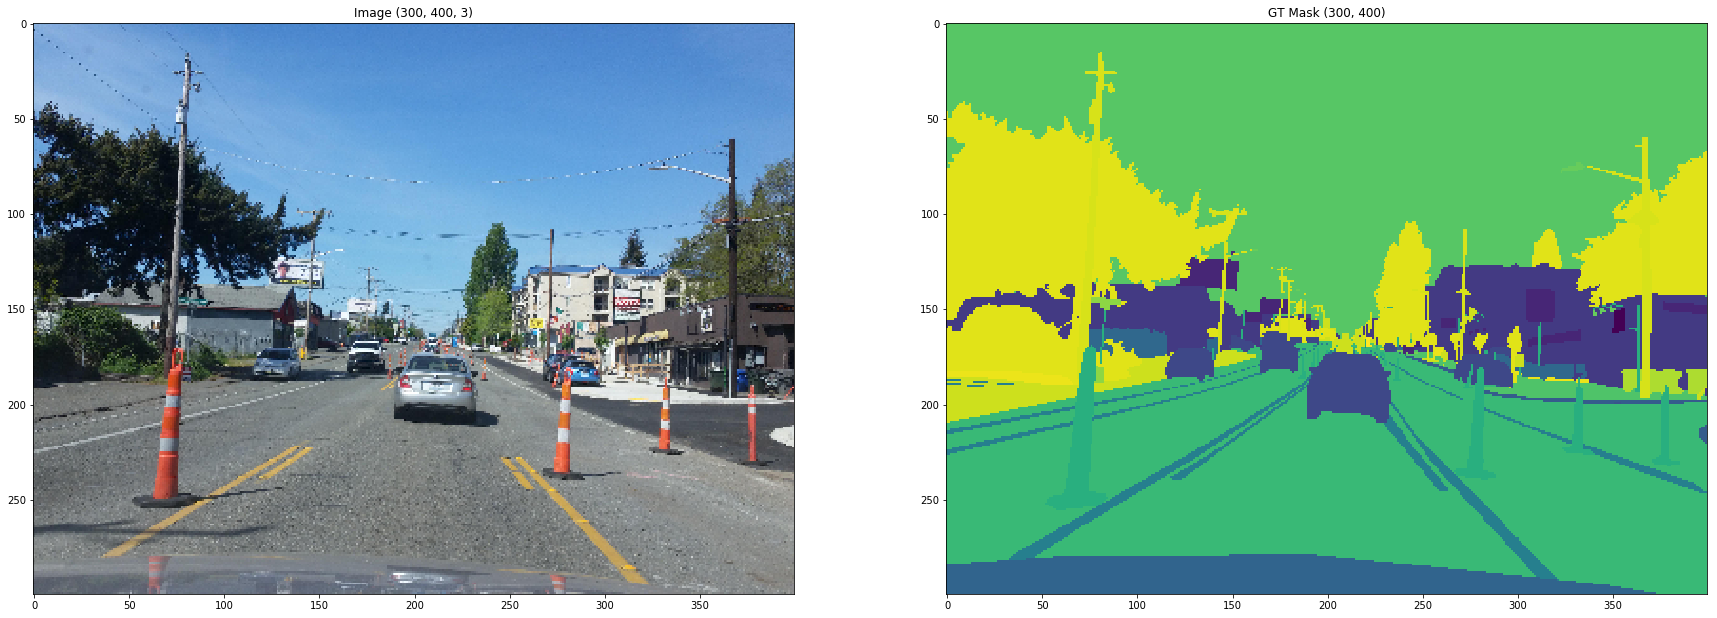

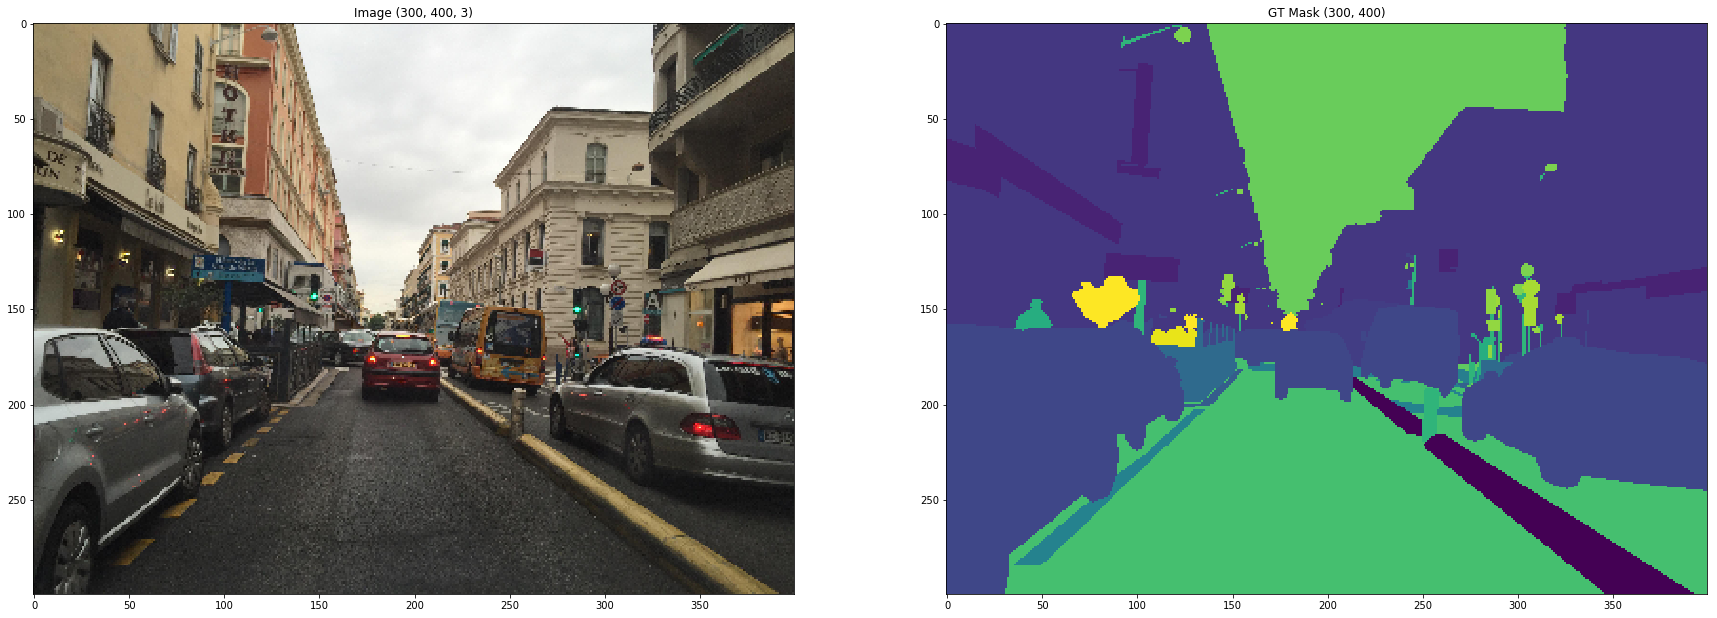

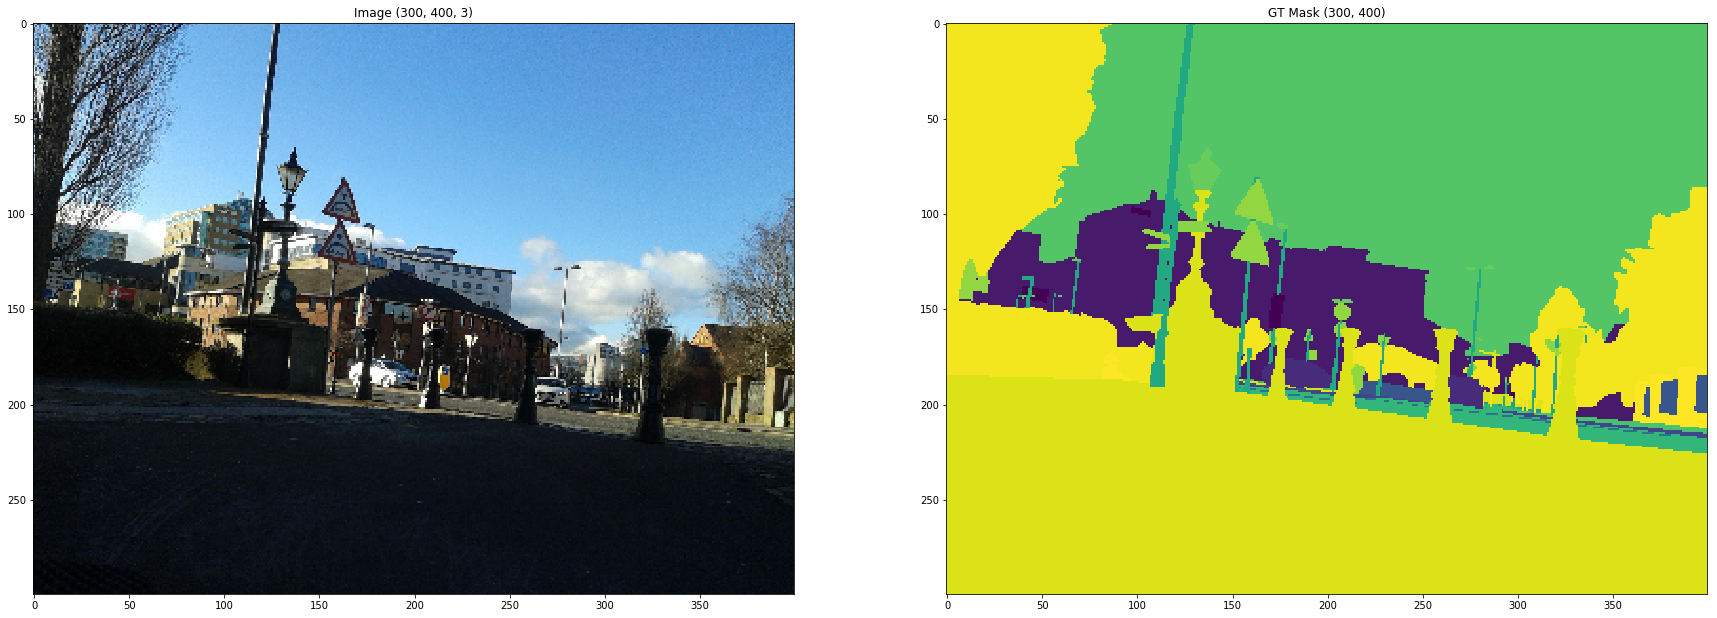

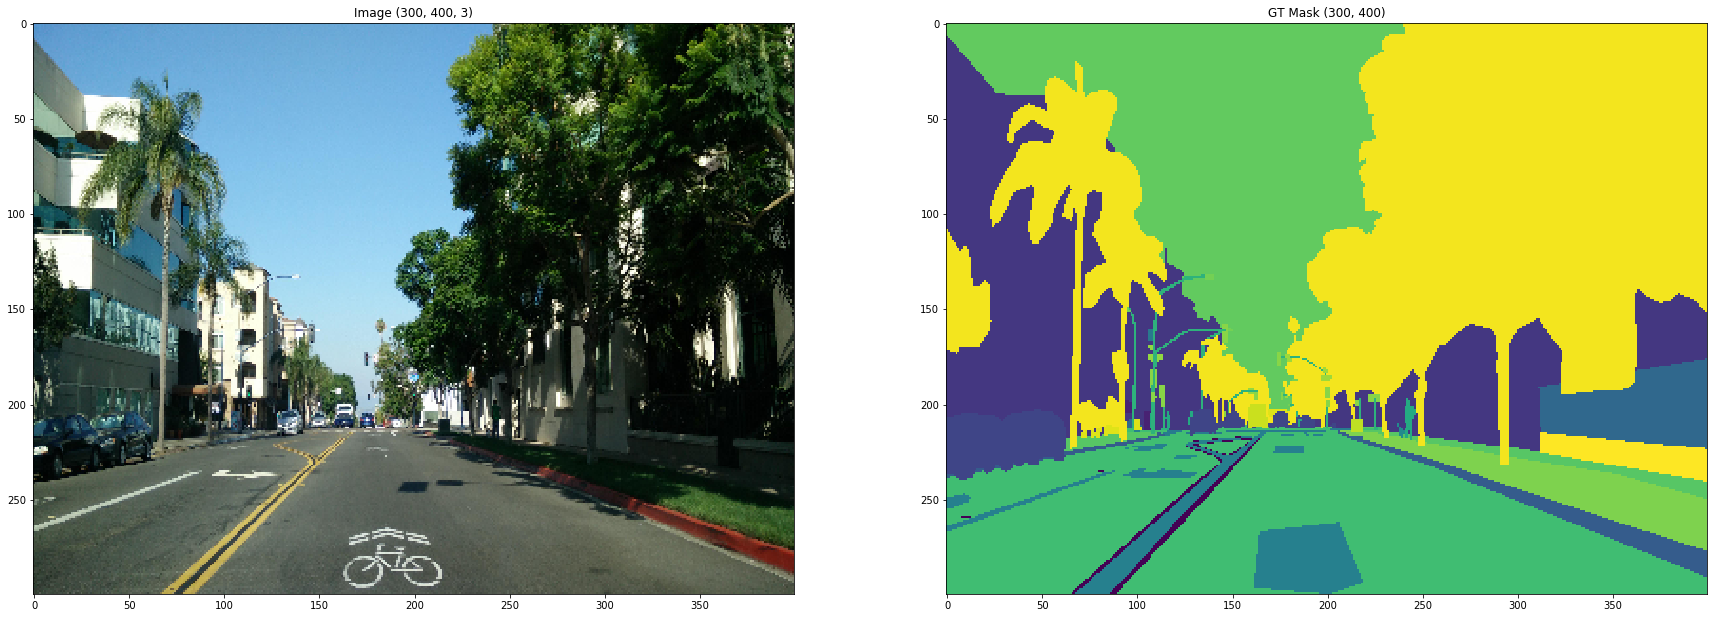

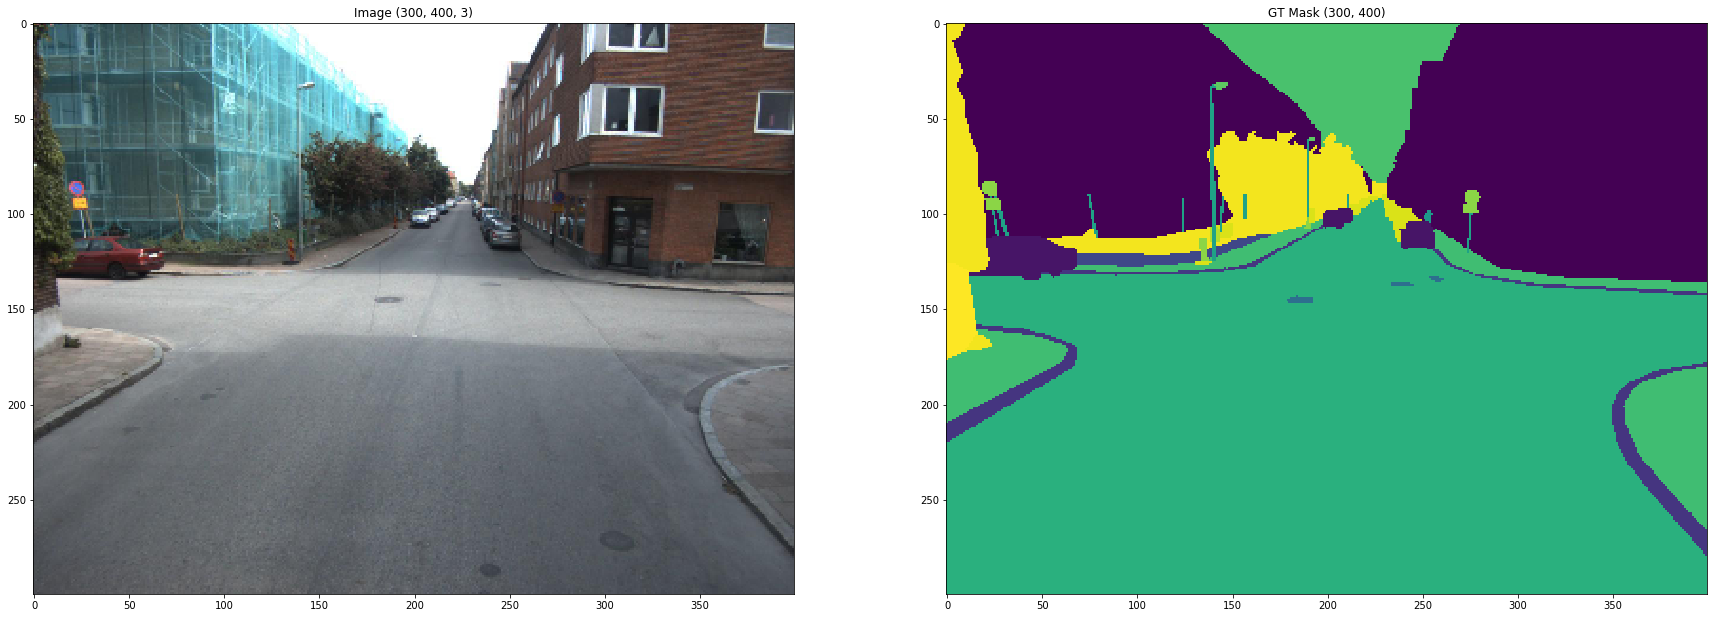

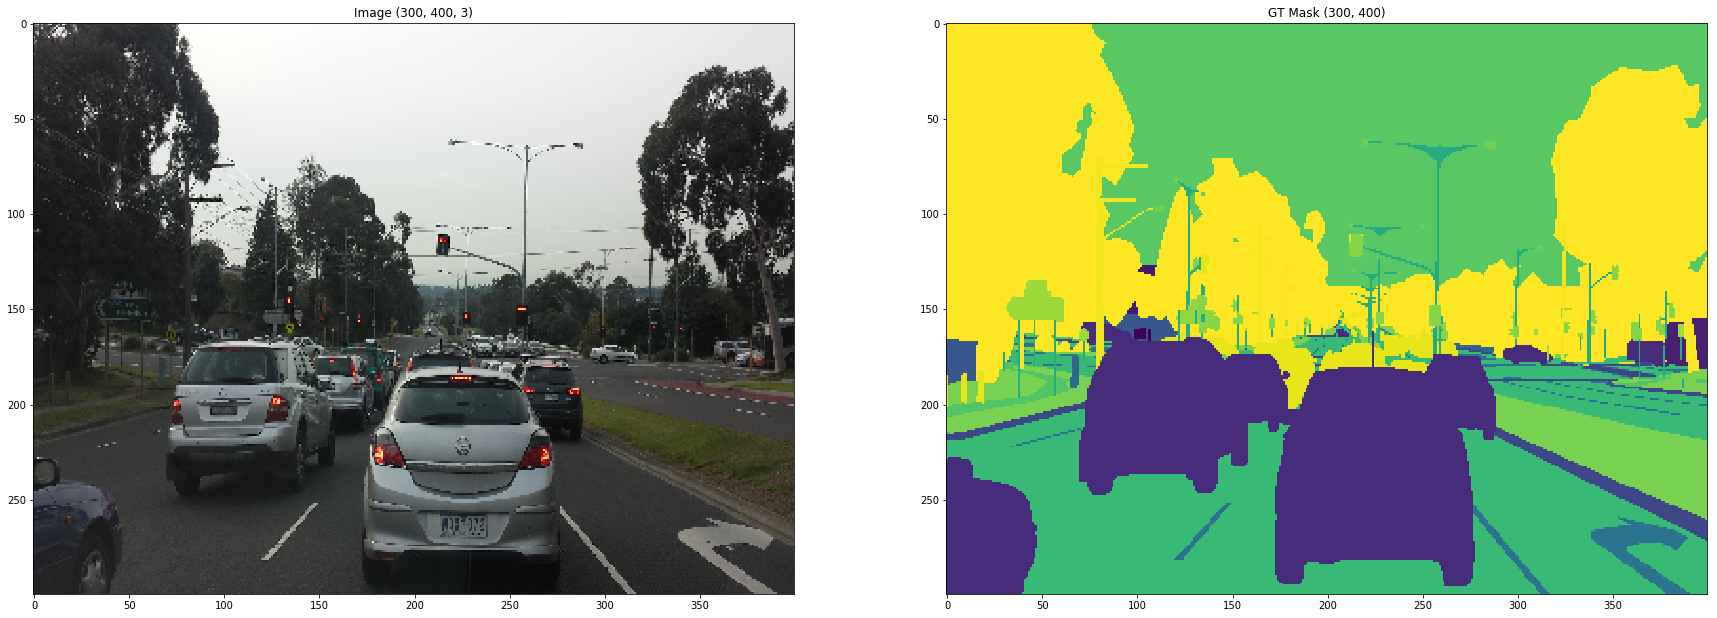

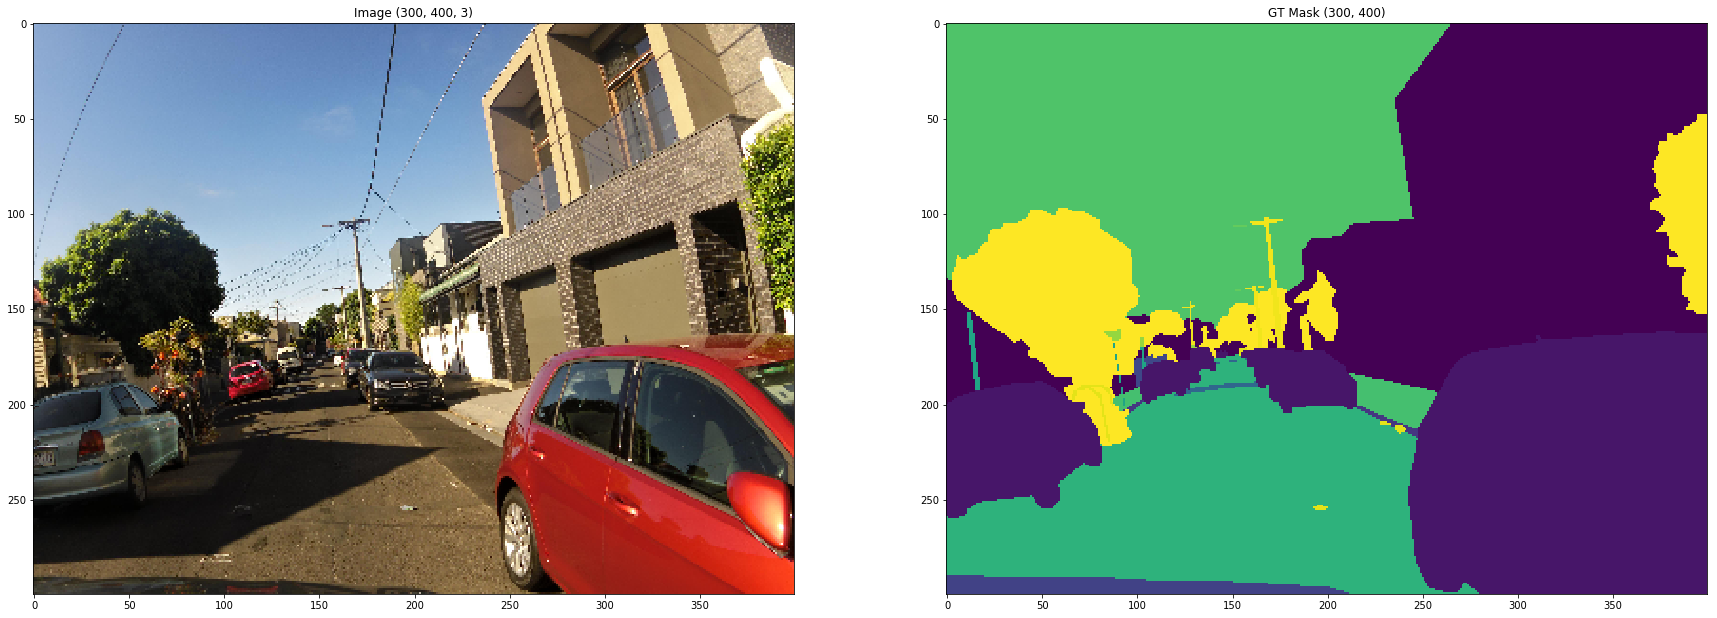

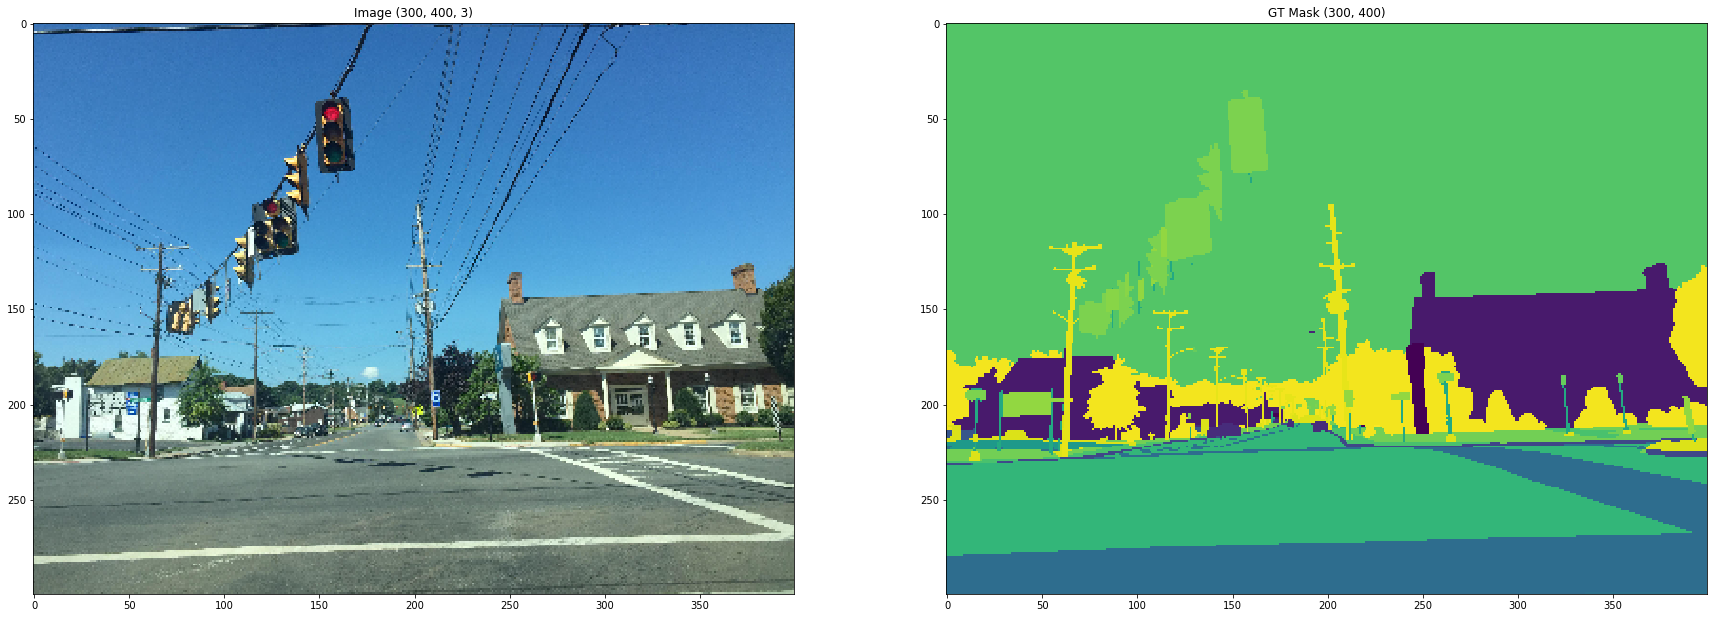

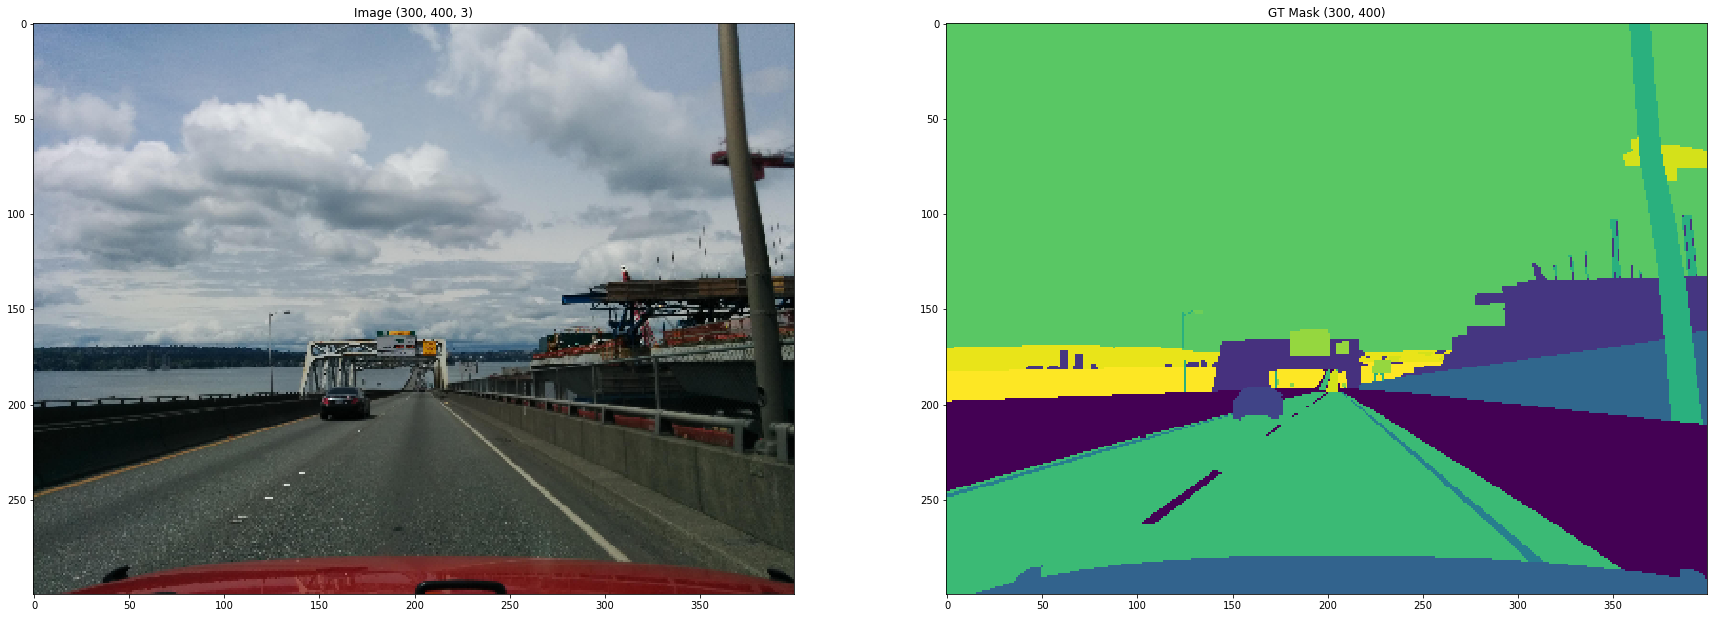

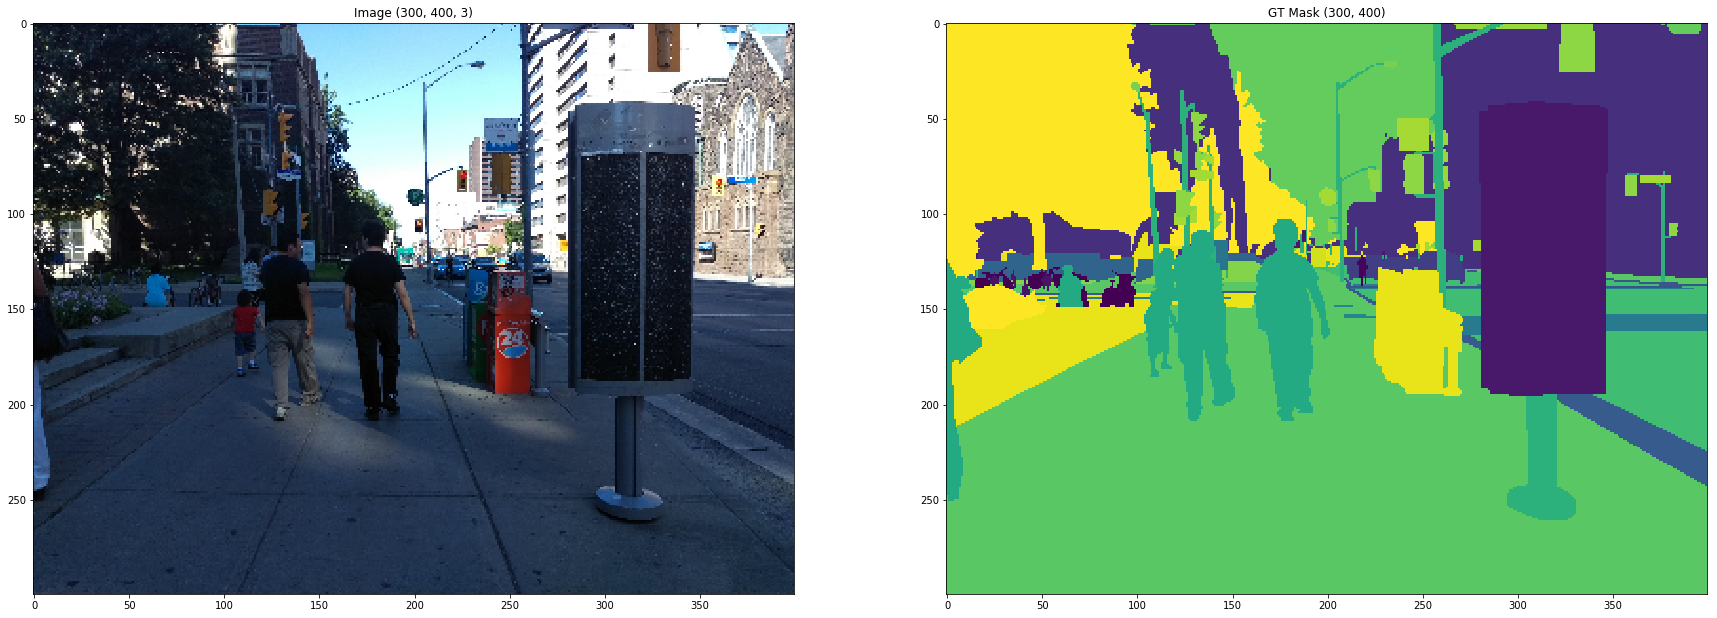

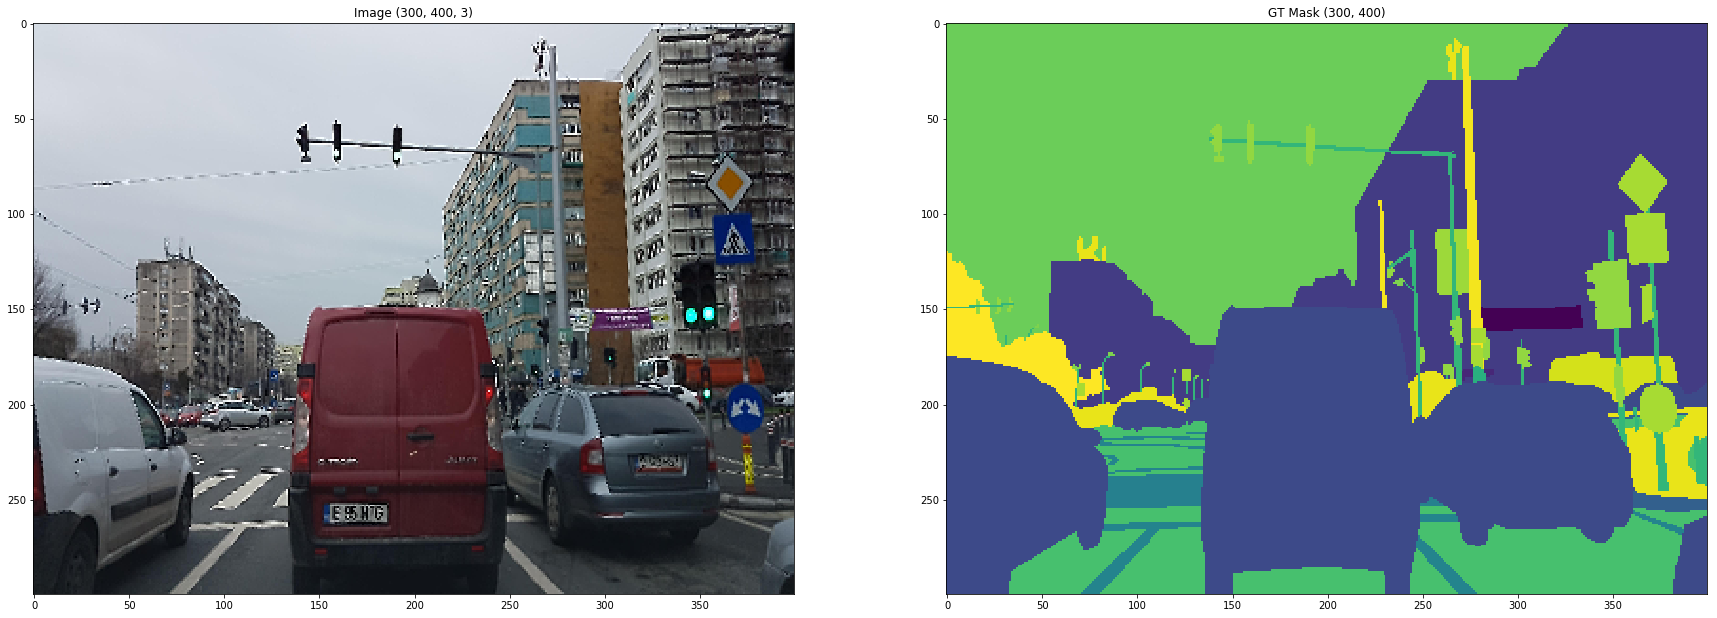

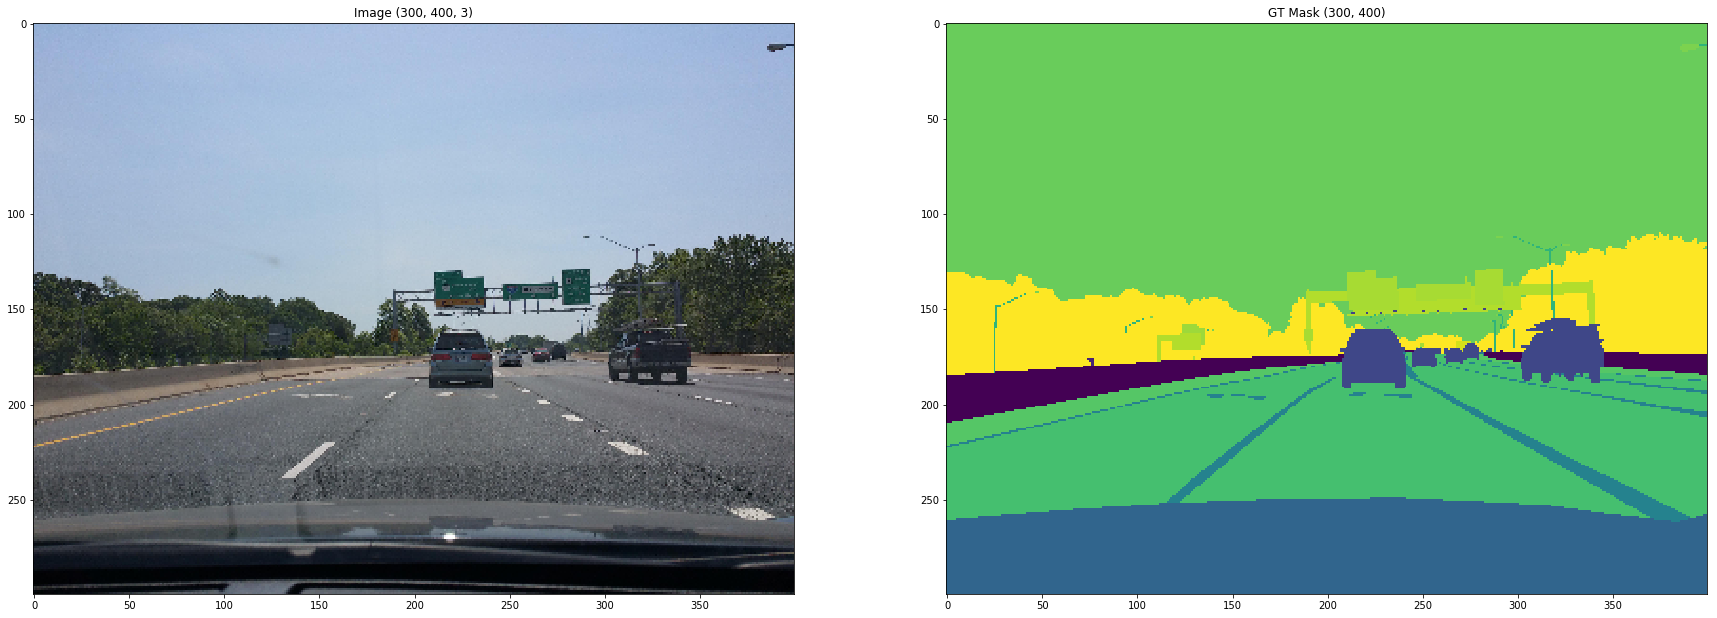

In [5]:
idx = np.random.randint(0, len(image_list), 20)
for i in idx:
    test = image.load_img(f'{image_dir}/{image_list[i]}', target_size=(300, 400))
    test_mask = image.load_img(f'{masks_dir}/{mask_list[i]}', target_size=(300, 400), grayscale=True)
    test = image.img_to_array(test).astype('uint8')
    test_mask = np.squeeze(image.img_to_array(test_mask)).astype('uint8')

    fig = plt.figure(figsize=(30, 15))
    ax = fig.add_subplot(121)
    ax.set_title(f'Image {test.shape}')
    ax.imshow(test)

    ax2 = fig.add_subplot(122)
    ax2.set_title(f'GT Mask {test_mask.shape}')
    ax2.imshow(test_mask)

In [ ]:
# for i in tqdm(range(len(mask_list))):
#     colored_mask = image.load_img(f'{masks_dir}/{mask_list[i]}', target_size=(300, 400))
#     colored_mask = np.squeeze(image.img_to_array(colored_mask)).astype('uint8')
#     label = color_to_labels(colored_mask)
#     cv2.imwrite(f'dataset/masks/{mask_list[i]}', label)
# colored_mask = image.load_img(f'dataset/masks/{mask_list[i]}', target_size=(300, 400), grayscale=True)
# colored_mask = np.squeeze(image.img_to_array(colored_mask)).astype('uint8')
# plt.imshow(colored_mask)

 92%|█████████▏| 18373/20000 [40:39<03:36,  7.53it/s]